# PART 1

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
(966, 150)
(322, 150)


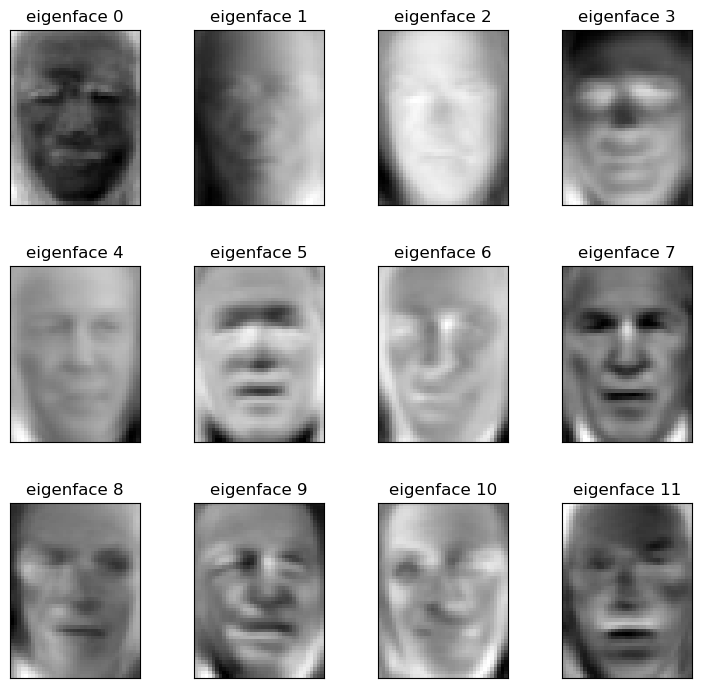

(966,)


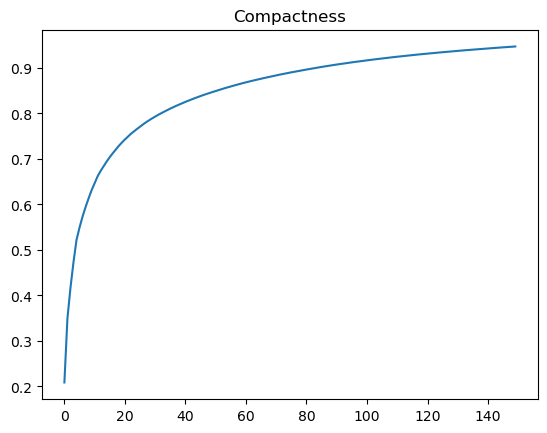

Total Testing 322
Predictions [3 3 6 3 3 3 3 1 3 3 3 3 3 3 3 3 4 3 3 4 1 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 1 3 1 1 3 3 3 4 3 3 3 3 3 1 2 1 3 5 3 6 1 3 4 3 5 3 4 1 3 6 6 3 3
 3 2 3 6 3 3 6 3 3 3 3 3 3 3 3 3 5 6 3 3 1 1 1 1 1 6 3 3 3 3 3 3 3 3 3 1 3
 1 6 3 3 3 3 4 1 3 1 3 3 1 3 4 5 3 1 3 6 6 6 3 3 4 3 3 1 3 3 3 3 1 3 3 1 3
 1 1 1 3 3 3 3 3 3 3 3 3 6 5 5 1 3 1 5 1 3 3 3 3 3 1 5 3 3 3 3 6 3 3 3 1 3
 3 3 3 3 2 4 3 2 3 6 3 3 3 3 0 3 3 3 3 5 1 4 2 3 2 1 5 3 3 4 3 3 1 3 3 6 6
 3 1 1 3 3 3 1 3 3 3 1 3 3 1 3 6 3 3 3 4 3 3 4 3 3 3 3 4 4 4 3 4 3 4 3 1 3
 3 3 3 3 1 3 6 6 1 6 1 1 1 3 3 6 3 3 3 3 3 1 1 3 3 3 2 3 3 3 4 3 3 5 3 3 3
 3 5 3 3 3 6 6 3 1 3 3 3 1 3 3 3 1 3 1 3 3 1 3 3 4 3]
Which Correct: [ True  True  True  True  True  True False  True  True  True  True  True
  True False  True  True False  True  True  True  True False  True False
 False  True False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False  True
 False  T

In [2]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
n_components = 150
mean = np.mean(X_train, axis=0)
X_train -= mean
X_test -= mean
U, S, V = np.linalg.svd(X_train, full_matrices=False)
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))
X_transformed = np.dot(X_train, components.T)
print(X_transformed.shape)
X_test_transformed = np.dot(X_test, components.T)
print(X_test_transformed.shape)
import matplotlib.pyplot as plt
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

explained_variance = (S ** 2) / (n_samples - 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
ratio_cumsum = np.cumsum(explained_variance_ratio)
print(ratio_cumsum.shape)
eigenvalueCount = np.arange(n_components)
plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title('Compactness')
plt.show()

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
estimator = RandomForestClassifier(n_estimators=150, max_depth=15, max_features=150)
estimator.fit(X_transformed, y_train) 
predictions = estimator.predict(X_test_transformed)
correct = predictions==y_test
total_test = len(X_test_transformed)
print("Total Testing", total_test)
print("Predictions", predictions)
print("Which Correct:",correct)
print("Total Correct:",np.sum(correct))
print("Accuracy:",np.sum(correct)/total_test)
print(classification_report(y_test, predictions, target_names=target_names))



Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


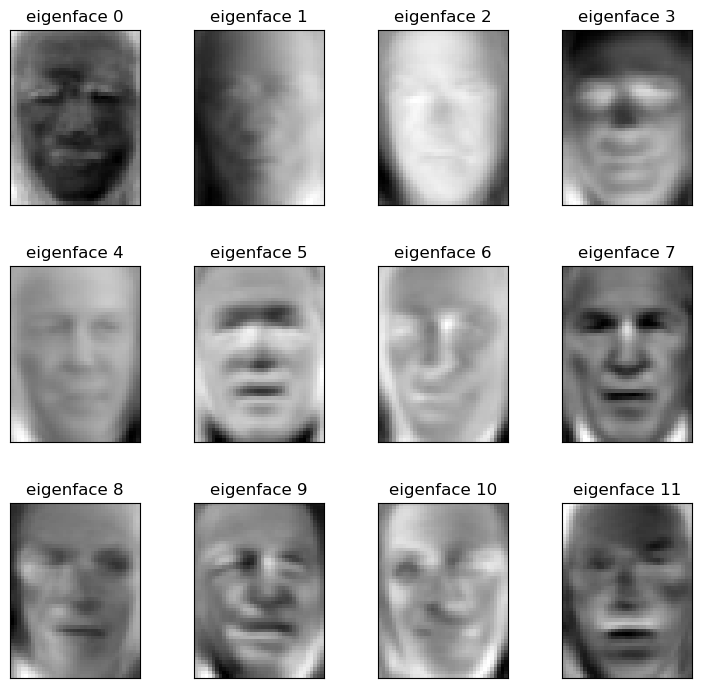

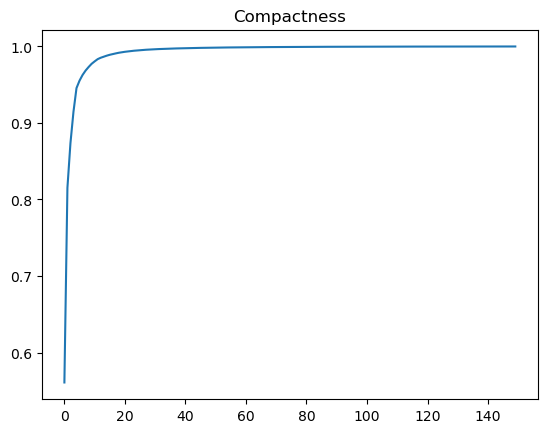

Total Testing 322
Predictions [3 3 4 3 3 3 3 1 3 3 3 3 3 3 3 3 6 3 3 4 1 1 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 3 3 1 1 3 3 3 4 3 3 3 3 3 1 2 1 3 6 3 6 1 3 4 3 5 1 4 1 3 6 6 3 3
 3 2 3 1 3 3 6 3 3 3 3 3 3 3 6 1 3 6 3 1 1 3 3 1 1 6 3 3 3 3 3 3 3 3 3 1 3
 1 6 3 3 3 1 4 1 3 3 3 3 1 3 4 5 3 1 3 6 6 3 3 3 4 3 3 1 3 3 3 3 1 3 3 3 3
 3 1 1 3 1 3 3 3 3 3 3 3 4 6 5 1 3 3 5 1 3 3 1 3 3 1 5 3 3 3 3 6 3 3 1 1 3
 3 3 3 3 2 6 3 2 3 6 3 3 3 3 0 3 2 3 3 5 1 4 2 6 3 2 5 3 3 4 4 3 1 3 3 3 6
 3 1 1 3 3 3 1 3 3 3 3 3 3 1 3 6 3 3 3 4 3 3 3 3 3 3 3 6 4 4 3 4 3 4 3 1 3
 3 3 3 3 1 3 5 4 1 6 1 1 1 3 3 6 3 3 3 3 3 1 1 3 3 3 1 3 3 3 4 3 3 5 3 3 3
 3 5 3 3 3 6 3 3 1 3 3 3 1 3 3 3 1 3 3 3 3 3 3 3 5 3]
Which Correct: [ True  True False  True  True  True False  True  True  True  True  True
  True False  True  True False  True  True  True  True False  True False
 False  True False  True  True  True False  True  True  True  True  True
  True  True  True  True  True False  True  True  True False False  True
 False  T

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target 
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

n_components = 150

mean = np.mean(X_train, axis=0)
X_train -= mean
X_test -= mean

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

U, S, V = np.linalg.svd(X_train, full_matrices=False)
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))

cov_matrix = torch.matmul(X_train.T, X_train) / X_train.shape[0]

_, S, V = torch.svd(cov_matrix)

top_eigenvectors = V[:, :n_components]

X_train_pca = torch.matmul(X_train, top_eigenvectors)

def plot_gallery(images, titles, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

plot_gallery(eigenfaces, eigenface_titles)
plt.show()

# Calculate explained variance ratio
explained_variance = (S ** 2) / (n_samples - 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
ratio_cumsum = np.cumsum(explained_variance_ratio)

# Plot explained variance
eigenvalueCount = np.arange(n_components)
plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title('Compactness')
plt.show()

# Convert data back to NumPy arrays for RandomForestClassifier
X_train_pca_np = X_train_pca.numpy()
X_test_pca_np = torch.matmul(X_test, top_eigenvectors).numpy()

# Train a RandomForestClassifier on the transformed data
estimator = RandomForestClassifier(n_estimators=150, max_depth=15, max_features=150, random_state=42)
estimator.fit(X_train_pca_np, y_train)

# Predict on the test set
predictions = estimator.predict(X_test_pca_np)

# Evaluate and print results
correct = predictions == y_test
total_test = len(X_test_pca_np)
print("Total Testing", total_test)
print("Predictions", predictions)
print("Which Correct:", correct)
print("Total Correct:", np.sum(correct))
print("Accuracy:", np.sum(correct) / total_test)
print(classification_report(y_test, predictions, target_names=target_names))




# PART2

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the LFW dataset using scikit-learn's fetch_lfw_people
from sklearn.datasets import fetch_lfw_people

# Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
y_test = torch.tensor(y_test, dtype=torch.int64)

# Define a CNN-based classifier
class CNNClassifier(nn.Module):
    def __init__(self, num_classes):
        super(CNNClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3)
        self.fc1 = nn.Linear(32 * ((h - 4) // 2) * ((w - 4) // 2), 128)  # Adjust input size based on your data dimensions
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.view(-1, 1, h, w)  # Reshape input for convolutional layers
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)  # Max pooling
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the CNN classifier
cnn_classifier = CNNClassifier(num_classes=len(target_names))

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_classifier.parameters(), lr=0.001)

# Training loop
batch_size = 64
num_epochs = 11

for epoch in range(num_epochs):
    cnn_classifier.train()
    total_loss = 0.0
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size].unsqueeze(1)
        labels = y_train[i:i+batch_size]

        optimizer.zero_grad()
        outputs = cnn_classifier(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / (len(X_train) / batch_size)}")

# Create an instance of the CNN classifier
cnn_classifier = CNNClassifier(num_classes=len(target_names))

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_classifier.parameters(), lr=0.001)

# Training loop
batch_size = 64
num_epochs = 11

for epoch in range(num_epochs):
    cnn_classifier.train()
    total_loss = 0.0
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size].unsqueeze(1)
        labels = y_train[i:i+batch_size]

        optimizer.zero_grad()
        outputs = cnn_classifier(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / (len(X_train) / batch_size)}")



Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Epoch 1/11, Loss: 1.839895805216724
Epoch 2/11, Loss: 1.8000763681857976
Epoch 3/11, Loss: 1.6759884125450877
Epoch 4/11, Loss: 1.475325306009802
Epoch 5/11, Loss: 1.2370576957244557
Epoch 6/11, Loss: 0.9831237827522167
Epoch 7/11, Loss: 0.7580417347744138
Epoch 8/11, Loss: 0.5765156786634315
Epoch 9/11, Loss: 0.4518335793576132
Epoch 10/11, Loss: 0.35890618626869
Epoch 11/11, Loss: 0.29025343387516883
                   precision    recall  f1-score   support

     Ariel Sharon       0.89      0.62      0.73        13
     Colin Powell       0.87      0.78      0.82        60
  Donald Rumsfeld       0.71      0.56      0.63        27
    George W Bush       0.90      0.90      0.90       146
Gerhard Schroeder       0.53      0.72      0.61        25
      Hugo Chavez       1.00      0.27      0.42        15
       Tony Blair       0.56      0.83      0.67        36

         accuracy                           0.79      

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.cuda.amp import autocast, GradScaler
from torchvision.models import resnet18

# Define the transform for data preprocessing
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomRotation(degrees=15),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load and preprocess CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=4)

# Create a ResNet-18 model
device = torch.device("mps" )
model = resnet18(pretrained=False, num_classes=10).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Use mixed precision training
scaler = GradScaler()

# Training loop
epochs = 50 # You can adjust the number of epochs
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        with autocast():
            outputs = model(inputs)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}")

# Test the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


100%|██████████| 170498071/170498071 [18:17<00:00, 155378.39it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/Users/gaurika/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/gaurika/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/Users/gaurika/anaconda3/lib/python3.11/site-packages/torch/cuda/amp/grad_scaler.py:120: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")
/Users/gaurika/anaconda3/lib/python3.11/site-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn

Epoch 1, Loss: 1.6311845523317148
Epoch 2, Loss: 1.306171444523365
Epoch 3, Loss: 1.1656153596880492
Epoch 4, Loss: 1.0626159494795153
Epoch 5, Loss: 0.9935181232364586
Epoch 6, Loss: 0.9347243815126931
Epoch 7, Loss: 0.8890683019862455
Epoch 8, Loss: 0.8546870558158212
Epoch 9, Loss: 0.8220700825876592
Epoch 10, Loss: 0.7968160713572636
Epoch 11, Loss: 0.77134396231083
Epoch 12, Loss: 0.7536828068211255
Epoch 13, Loss: 0.7332367656938256
Epoch 14, Loss: 0.7082999822733652
Epoch 15, Loss: 0.7041670732638415
Epoch 16, Loss: 0.683360377388537
Epoch 17, Loss: 0.6772951703242329
Epoch 18, Loss: 0.6573339250234081
Epoch 19, Loss: 0.6479256307072652
Epoch 20, Loss: 0.6386927345677105
Epoch 21, Loss: 0.6292093739942517
Epoch 22, Loss: 0.6169826317473751
Epoch 23, Loss: 0.6060729792050998
Epoch 24, Loss: 0.601153605048309
Epoch 25, Loss: 0.5935795371947081
Epoch 26, Loss: 0.5793489563038282
Epoch 27, Loss: 0.5770831983869947
Epoch 28, Loss: 0.5690111399763991
Epoch 29, Loss: 0.5569935889195299

# PART 3

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define device (GPU or CPU)
device = torch.device("mps")

# Define hyperparameters
learning_rate = 0.001
batch_size = 8
num_epochs = 50

# Data directories
data_dir = "/Users/gaurika/Downloads/keras_png_slices_data"
# Generate synthetic data and corresponding targets for demonstration purposes
data = []  # List of data samples (e.g., images)
targets = []  # List of corresponding labels or targets

# Generate example data and targets (replace this with your real data)
for i in range(100):
    image = np.random.rand(32, 32, 3)  # Example image (replace with your actual data)
    label = np.random.randint(0, 2)  # Example label (replace with your actual labels)
    data.append(image)
    targets.append(label)

# Convert data and targets to NumPy arrays (if not already)
data = np.array(data)
targets = np.array(targets)

# Define custom dataset and dataloaders
class MRImageDataset():
    def __init__(self, data_dir, transform=None):
        # Implement data loading and preprocessing here
        self.data = data
        self.targets = targets
        self.transform = transform
        
      

    def __len__(self):
        # Return the number of samples
         return len(self.data)
     

    def __getitem__(self, index):
        sample = self.data[index]
        target = self.targets[index]

        if self.transform:
            sample = self.transform(sample)

        return sample, target

# Split the dataset into training, validation, and test sets
dataset = MRImageDataset(data_dir, transform=transforms.Compose([transforms.ToTensor()]))
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        # Define your UNet architecture here
        pass

    def forward(self, x):
        # Implement the forward pass
        pass

# Initialize the model and move it to the device
model = UNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for images, masks in tqdm(train_loader):
        images, masks = images.to(device), masks.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, masks)
        
        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

    # Print training loss for this epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss / len(train_loader)}")

    # Validation
    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            loss = criterion(outputs, masks)
            val_loss += loss.item()

    # Print validation loss for this epoch
    print(f"Validation Loss: {val_loss / len(val_loader)}")

    # Add logic for early stopping if needed
# Implement evaluation metrics (Dice Similarity Coefficient, IoU, etc.)
# Visualize segmentation results on test data
# Save or display visualizations as needed



ValueError: optimizer got an empty parameter list